### IMPORT

In [2]:
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
from PIL import Image

In [4]:
import seaborn as sns

### LOAD DATASETS

In [5]:
import pathlib
data_dir_1 = r"C:\Users\Beyond\Comp_Vision_assign_datasets\Rice_disease_dataset\rice_leaf_diseases"
data_dir_1 = pathlib.Path(data_dir_1)

In [6]:
# Determining the image counts for all the images
image_count_1 = len(list(data_dir_1.glob('*/*.jpg')))
print(image_count_1)

120


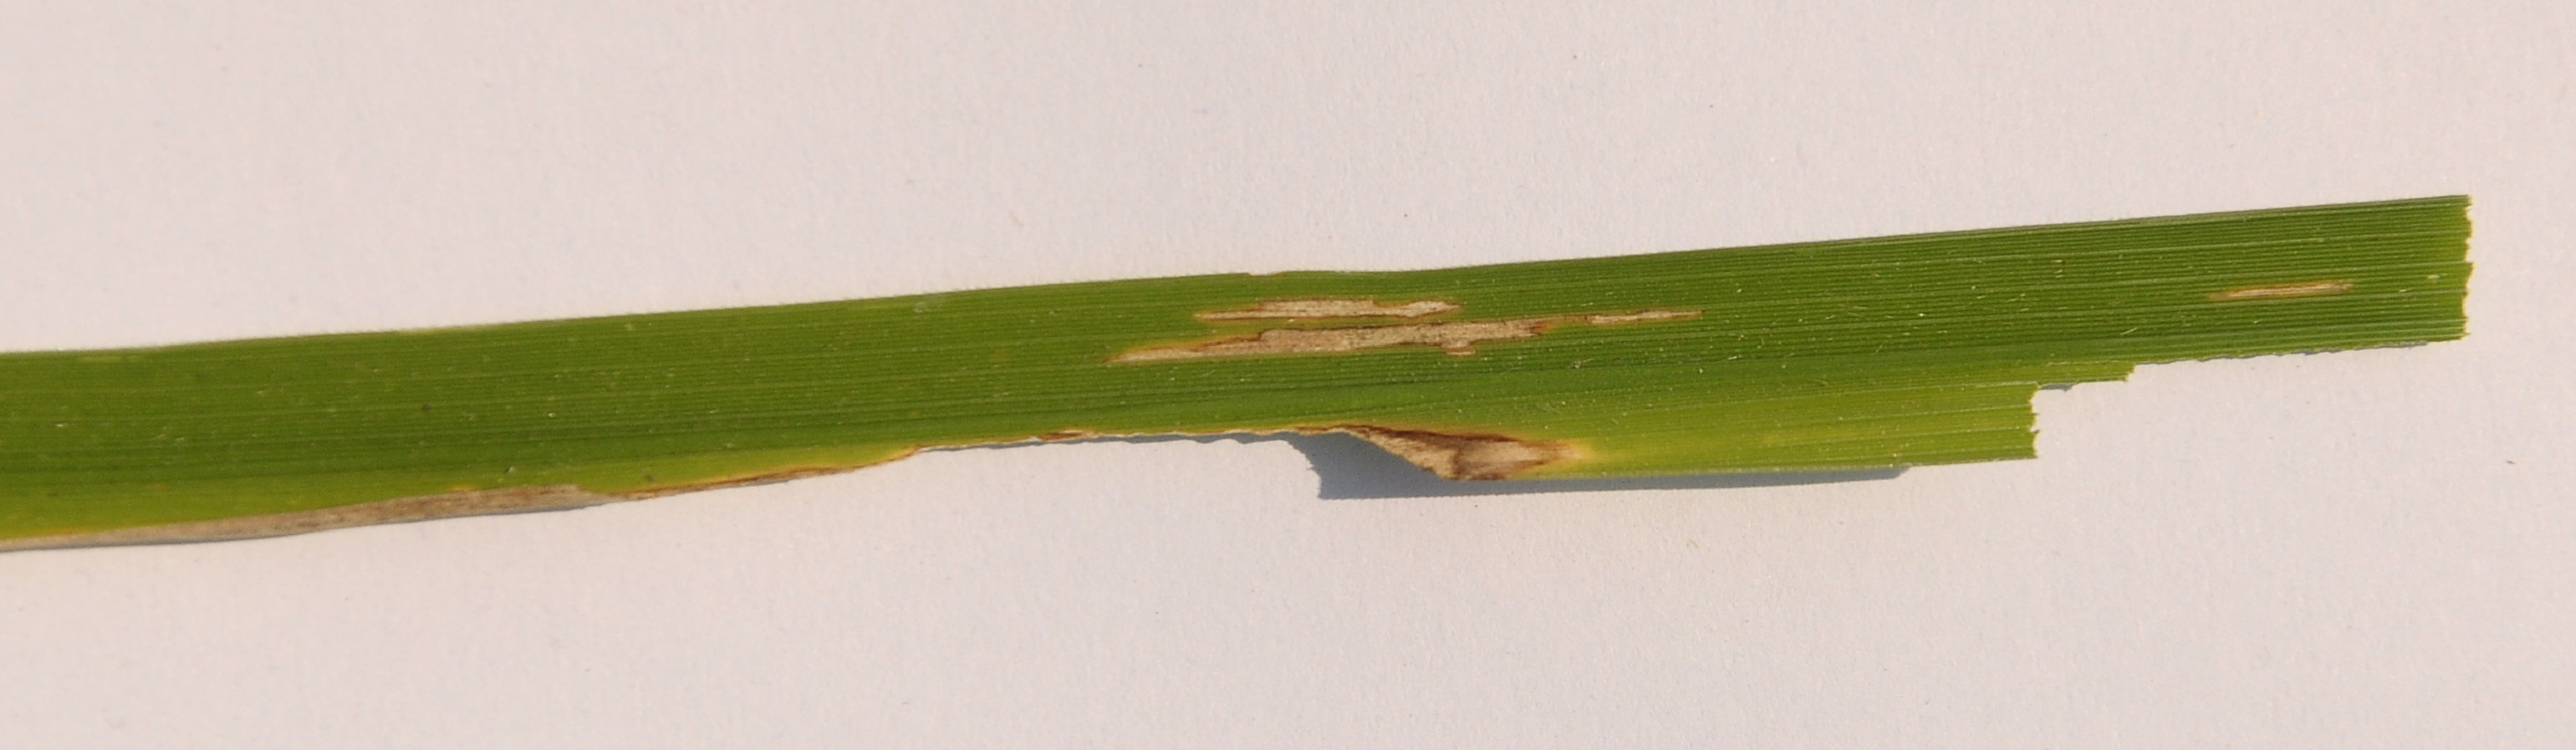

In [92]:
# Defining bacterial leaf blight images
Bacterial_leaf_blight = list(data_dir_1.glob('Bacterial leaf blight/*'))
Image.open(str(Bacterial_leaf_blight[0]))

In [93]:
Bacterial_leaf_blight_count=len(Bacterial_leaf_blight)
Bacterial_leaf_blight_count

40

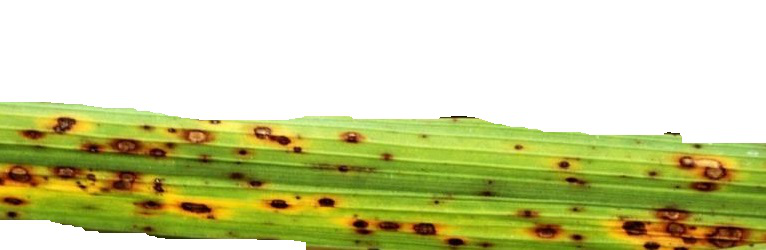

In [94]:
# Defining brown spot disease images
Brown_spot = list(data_dir_1.glob('Brown spot/*'))
Image.open(str(Brown_spot[0]))

In [95]:
Brown_spot_count=len(Brown_spot)
Brown_spot_count

40

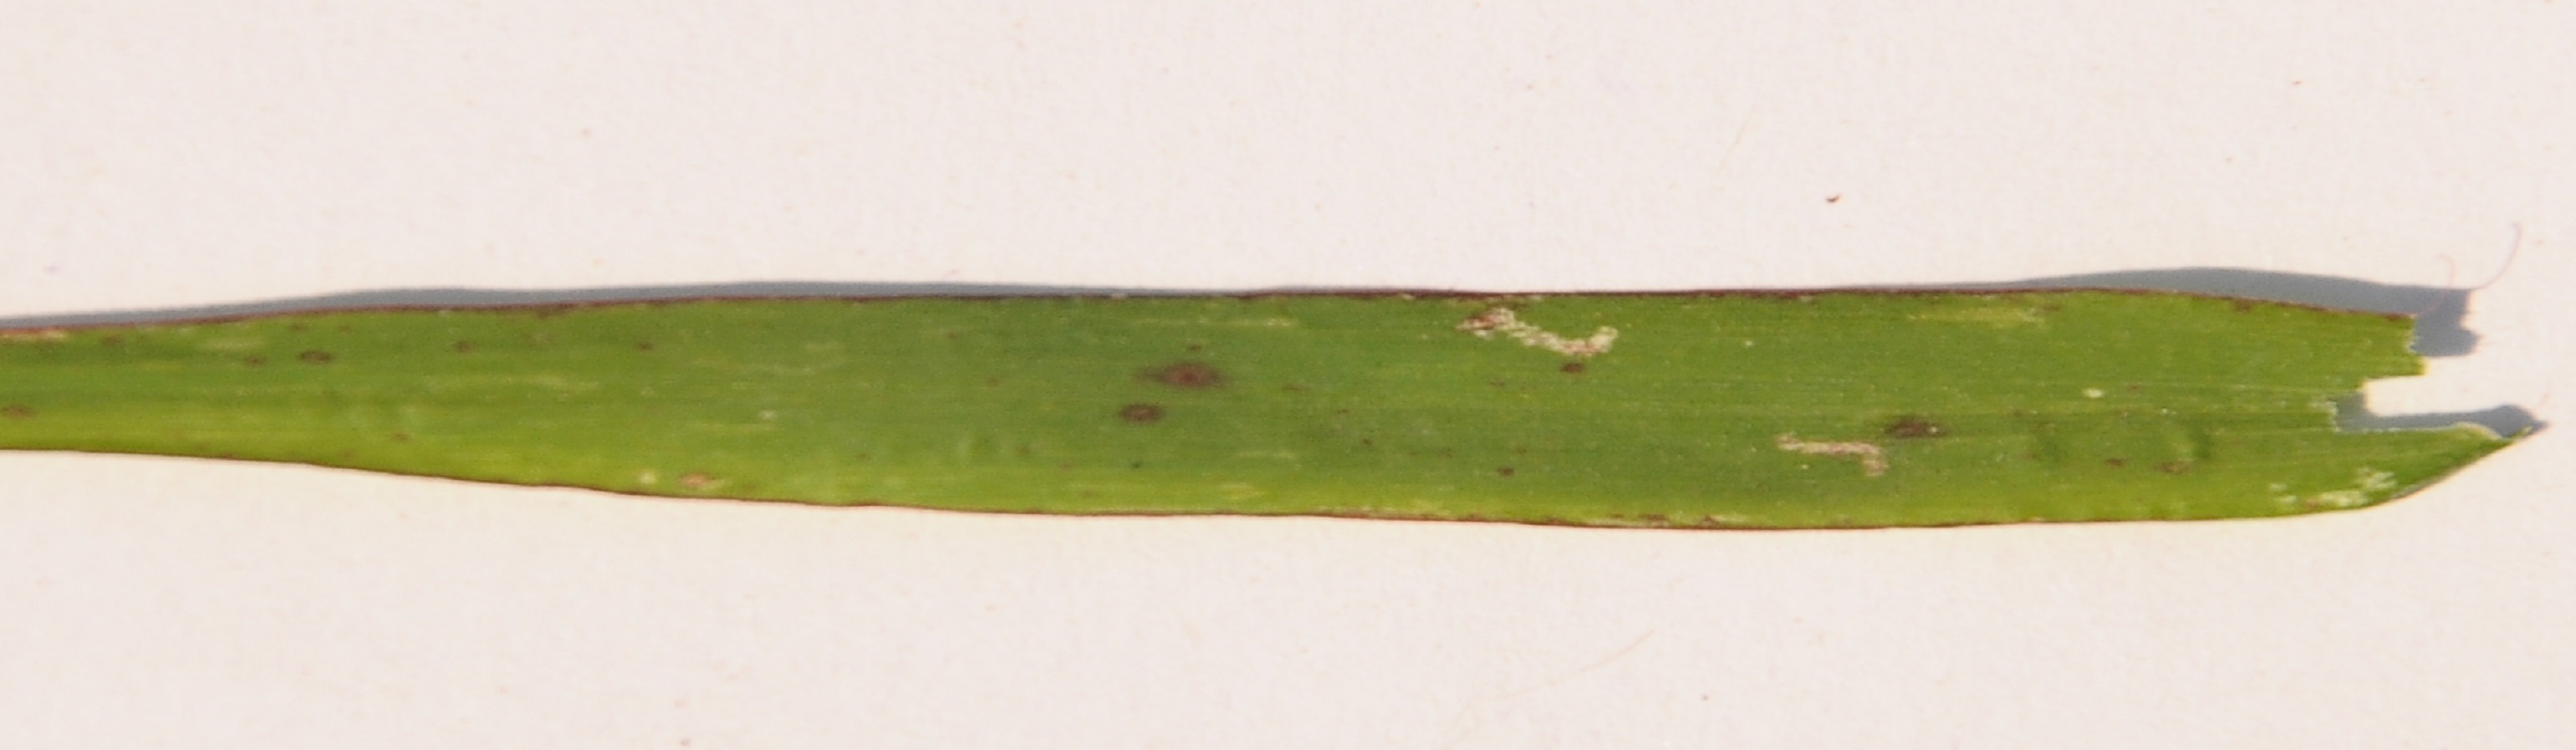

In [96]:
# Defining leaf smut images
Leaf_smut = list(data_dir_1.glob('Leaf smut/*'))
Image.open(str(Leaf_smut[0]))

In [97]:
Leaf_smut_count=len(Leaf_smut)
Leaf_smut_count

40

### PRE-PROCESSING

In [98]:
# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(data_dir_1):
    
    subfolder_path = os.path.join(data_dir_1, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

In [99]:
#Number of labels
df["label"].nunique()

3

In [100]:
#Label names
df["label"].unique()

array(['Bacterial leaf blight', 'Brown spot', 'Leaf smut'], dtype=object)

In [101]:
mask_label = "Bacterial leaf blight"
df_ar = df[df["label"] == mask_label]
df_ar.head()

image                  label
0  C:\Users\Beyond\Comp_Vision_assign_datasets\Ri...  Bacterial leaf blight
1  C:\Users\Beyond\Comp_Vision_assign_datasets\Ri...  Bacterial leaf blight
2  C:\Users\Beyond\Comp_Vision_assign_datasets\Ri...  Bacterial leaf blight
3  C:\Users\Beyond\Comp_Vision_assign_datasets\Ri...  Bacterial leaf blight
4  C:\Users\Beyond\Comp_Vision_assign_datasets\Ri...  Bacterial leaf blight

Text(0, 0.5, 'Number of Samples per Class')

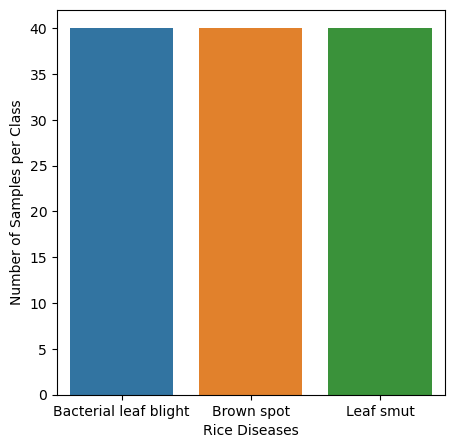

In [102]:
plt.figure(figsize=(5,5))

ax=sns.countplot(x=df.label)
ax.set_xlabel("Rice Diseases")
ax.set_ylabel("Number of Samples per Class")

### SPLITTING THE DATASET INTO TEST TRAIN SPLIT

In [103]:
x_train, x_test, y_train, y_test = train_test_split(df["image"], df["label"], test_size=0.2, random_state=786)

In [104]:
df_train = pd.DataFrame({'image': x_train, 'label': y_train})

In [105]:
df_test = pd.DataFrame({'image': x_test, 'label': y_test})

In [106]:
encoder=LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [107]:
y_train

array([1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1,
       0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0,
       2, 2, 0, 2, 2, 1, 2, 0])

### DATA AUGMENTATION

In [108]:
from keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 96 validated image filenames belonging to 3 classes.
Found 24 validated image filenames belonging to 3 classes.


### APPLYING CNN

In [109]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Flatten, Dense

In [110]:
input_shape=(50,50,3)

In [111]:
from keras.layers import Dropout
from keras.regularizers import l2

In [112]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))  # Dropout 25% of the nodes
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [113]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [114]:
# Train the model on the training data
history = model.fit_generator(train_generator,epochs=20,validation_data=test_generator)

Epoch 1/20
3/3 [==============================] - 5s 2s/step - loss: 1.1712 - accuracy: 0.3646 - val_loss: 1.1185 - val_accuracy: 0.3750
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 1.1821 - accuracy: 0.2812 - val_loss: 1.0613 - val_accuracy: 0.5417
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 1.0619 - accuracy: 0.4167 - val_loss: 1.0957 - val_accuracy: 0.2500
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 1.0648 - accuracy: 0.3750 - val_loss: 1.0247 - val_accuracy: 0.4583
Epoch 5/20
3/3 [==============================] - 3s 1s/step - loss: 1.0266 - accuracy: 0.4583 - val_loss: 1.0136 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 4s 2s/step - loss: 1.0055 - accuracy: 0.5208 - val_loss: 0.9775 - val_accuracy: 0.5833
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.9832 - accuracy: 0.4896 - val_loss: 0.9664 - val_accuracy: 0.5000
Epoch 8/20
3/3 [=========================

### EVALUATING THE MODEL

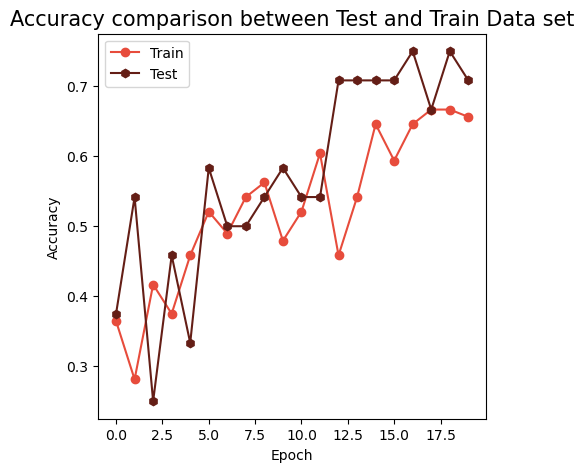

In [115]:
# Plot accuracy comparison between Validation and Train Data set
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], color="#E74C3C", marker='o')
plt.plot(history.history['val_accuracy'], color='#641E16', marker='h')
plt.title('Accuracy comparison between Test and Train Data set', fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [116]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

1/1 [==============================] - 1s 609ms/step - loss: 0.7163 - accuracy: 0.7083
Accuracy: 0.7083333134651184


Accuracy: 0.7083333333333334
Recall: 0.7083333333333334
Precision: 0.7104166666666667


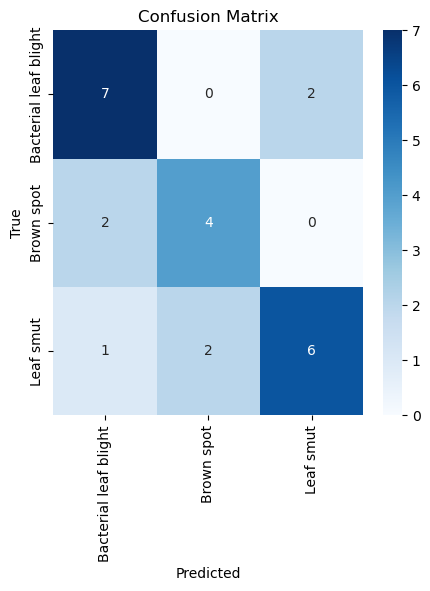

In [117]:
# Step 1: Make predictions using the trained model on the test data
y_pred = model.predict_generator(test_generator)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Extract true labels from the test data generator
y_true = test_generator.classes

# Step 2: Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes, average='weighted')
precision = precision_score(y_true, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

# Step 3: Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Get class labels from the test generator
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()